(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Epoch 1/50


c:\Users\jeshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.3348 - loss: 3.3564 - val_accuracy: 0.8679 - val_loss: 0.4894 - learning_rate: 0.0010
Epoch 2/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.7888 - loss: 0.7317 - val_accuracy: 0.9427 - val_loss: 0.2365 - learning_rate: 0.0010
Epoch 3/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.8720 - loss: 0.4447 - val_accuracy: 0.9737 - val_loss: 0.0974 - learning_rate: 0.0010
Epoch 4/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9173 - loss: 0.2988 - val_accuracy: 0.9758 - val_loss: 0.0826 - learning_rate: 0.0010
Epoch 5/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9132 - loss: 0.3157 - val_accuracy: 0.9773 - val_loss: 0.0791 - learning_rate: 0.0010
Epoch 6/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9351 - loss: 0.2345 - val_accuracy: 0.9815 - val_loss: 0.0597 - learning_rate: 0.0010
Epoch 7/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9297 - loss: 0.2667

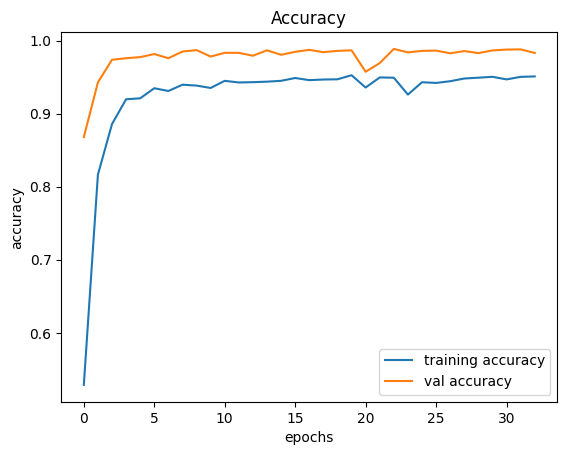

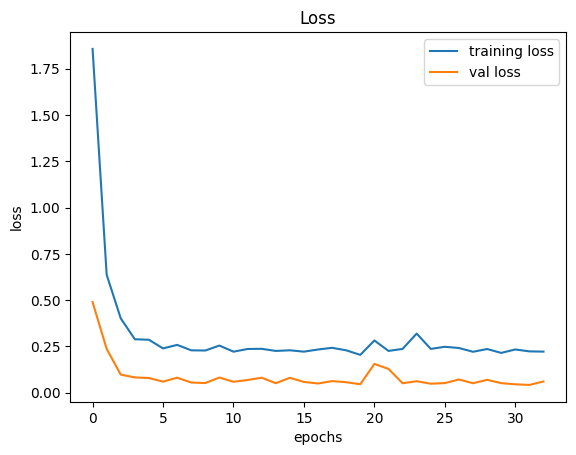

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
Accuracy: 0.9570071258907363


In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import *
from sklearn.metrics import accuracy_score

data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(43, activation = 'softmax'))

callback = EarlyStopping(monitor = 'val_accuracy', patience = 10, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 1e-1, patience = 10, verbose = 1, min_lr = 2e-6)

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 50
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test), callbacks=[callback, reduce_lr])
model.save("my_model.h5")

#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict(X_test)
pred_labels = np.argmax(pred, axis=1)
accuracy = accuracy_score(labels, pred_labels)
#Accuracy with the test data
print("Accuracy:", accuracy)

In [25]:
from sklearn.metrics import confusion_matrix
score = model.predict(X_test,verbose = 0)
score = np.argmax(score, axis = 1)
new_y_test = y_test.ClassId.values
cn = confusion_matrix(new_y_test,score)
print(cn)

[[ 58   0   0 ...   0   0   0]
 [  0 703   0 ...   2   0   0]
 [  1  16 725 ...   1   0   0]
 ...
 [  0   1   0 ...  87   0   0]
 [  0   0   0 ...   0  44   0]
 [  0   0   0 ...   0   2  70]]


In [26]:
from sklearn.metrics import classification_report
#labels = [for i in classes.values()]
class_labels = list(range(43))
print(classification_report(new_y_test, score, target_names =[str(label) for label in class_labels]))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        60
           1       0.95      0.98      0.96       720
           2       0.97      0.97      0.97       750
           3       0.96      0.97      0.96       450
           4       0.97      0.99      0.98       660
           5       0.96      0.93      0.94       630
           6       0.93      0.92      0.93       150
           7       0.99      0.98      0.98       450
           8       0.95      0.99      0.97       450
           9       0.96      0.98      0.97       480
          10       0.99      0.97      0.98       660
          11       0.93      0.95      0.94       420
          12       0.99      0.97      0.98       690
          13       0.98      0.99      0.98       720
          14       0.99      0.98      0.99       270
          15       1.00      0.99      1.00       210
          16       0.93      0.99      0.96       150
          17       0.98    

<Axes: >

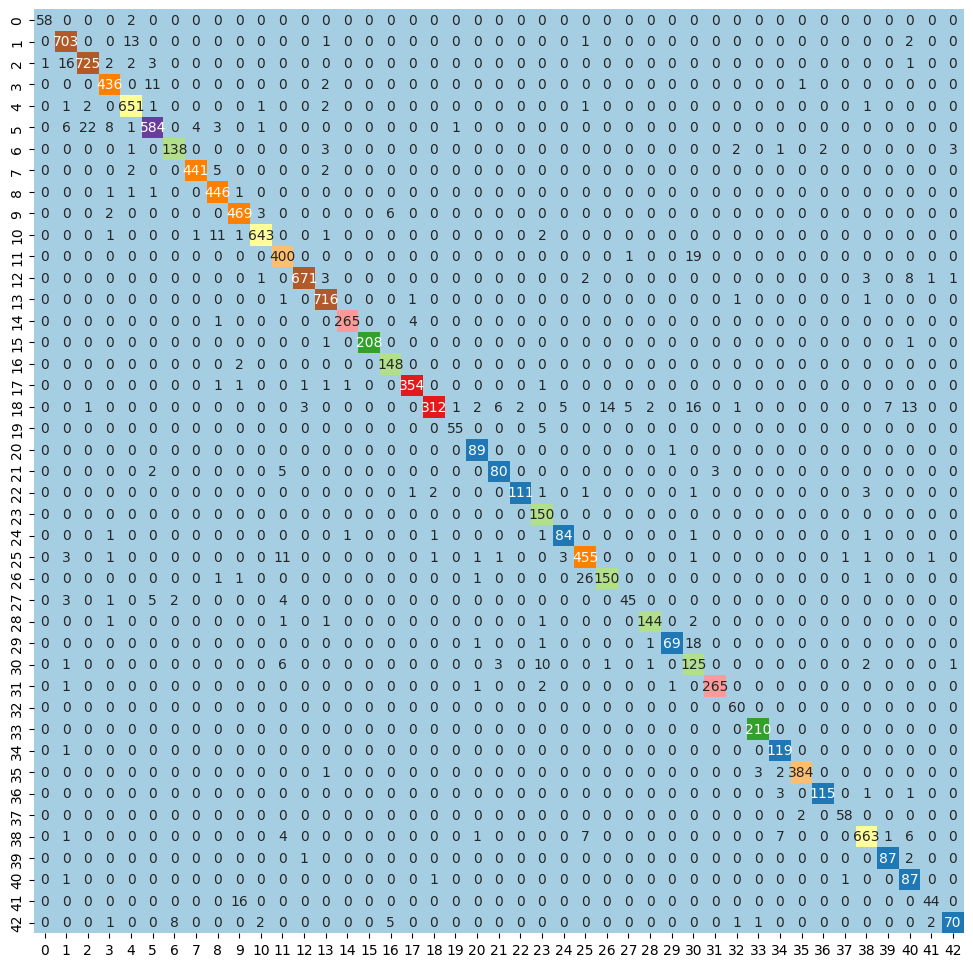

In [27]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(cn, annot = True, cbar = False, cmap='Paired', fmt="d")

In [28]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',      
            3:'Speed limit (50km/h)',       
            4:'Speed limit (60km/h)',      
            5:'Speed limit (70km/h)',    
            6:'Speed limit (80km/h)',      
            7:'End of speed limit (80km/h)',     
            8:'Speed limit (100km/h)',    
            9:'Speed limit (120km/h)',     
           10:'No passing',   
           11:'No passing veh over 3.5 tons',     
           12:'Right-of-way at intersection',     
           13:'Priority road',    
           14:'Yield',     
           15:'Stop',       
           16:'No vehicles',       
           17:'Veh > 3.5 tons prohibited',       
           18:'No entry',       
           19:'General caution',     
           20:'Dangerous curve left',      
           21:'Dangerous curve right',   
           22:'Double curve',      
           23:'Bumpy road',     
           24:'Slippery road',       
           25:'Road narrows on the right',  
           26:'Road work',    
           27:'Traffic signals',      
           28:'Pedestrians',     
           29:'Children crossing',     
           30:'Bicycles crossing',       
           31:'Beware of ice/snow',
           32:'Wild animals crossing',      
           33:'End speed + passing limits',      
           34:'Turn right ahead',     
           35:'Turn left ahead',       
           36:'Ahead only',      
           37:'Go straight or right',      
           38:'Go straight or left',      
           39:'Keep right',     
           40:'Keep left',      
           41:'Roundabout mandatory',     
           42:'End of no passing',      
           43:'End no passing veh > 3.5 tons' }

In [29]:
# Calculate class-wise accuracy
classwise_acc = cn.diagonal() / cn.sum(axis=1) * 100

# Create DataFrame for class-wise accuracy
cls_acc = pd.DataFrame({'Class_Label': [classes[i] for i in range(1, len(classes) + 1)], 'Accuracy': classwise_acc}, columns=['Class_Label', 'Accuracy'])

# Format the DataFrame
cls_acc_styled = cls_acc.style.format({"Accuracy": "{:,.2f}"}).set_caption("Class-wise Accuracy").bar(subset=["Accuracy"], color='peach')

# Display the styled DataFrame with the bar plot
cls_acc_styled


,Class_Label,Accuracy
0,Speed limit (20km/h),96.67
1,Speed limit (30km/h),97.64
2,Speed limit (50km/h),96.67
3,Speed limit (60km/h),96.89
4,Speed limit (70km/h),98.64
5,Speed limit (80km/h),92.70
6,End of speed limit (80km/h),92.00
7,Speed limit (100km/h),98.00
8,Speed limit (120km/h),99.11
9,No passing,97.71


In [32]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy as np

# Load the trained model to classify signs
from keras.models import load_model

# Load the model
model = load_model('my_model.h5')

# Dictionary to label all traffic signs classes
classes = {1: 'Speed limit (20km/h)',
           2: 'Speed limit (30km/h)',
           3: 'Speed limit (50km/h)',
           4: 'Speed limit (60km/h)',
           5: 'Speed limit (70km/h)',
           6: 'Speed limit (80km/h)',
           7: 'End of speed limit (80km/h)',
           8: 'Speed limit (100km/h)',
           9: 'Speed limit (120km/h)',
           10: 'No passing',
           11: 'No passing veh over 3.5 tons',
           12: 'Right-of-way at intersection',
           13: 'Priority road',
           14: 'Yield',
           15: 'Stop',
           16: 'No vehicles',
           17: 'Veh > 3.5 tons prohibited',
           18: 'No entry',
           19: 'General caution',
           20: 'Dangerous curve left',
           21: 'Dangerous curve right',
           22: 'Double curve',
           23: 'Bumpy road',
           24: 'Slippery road',
           25: 'Road narrows on the right',
           26: 'Road work',
           27: 'Traffic signals',
           28: 'Pedestrians',
           29: 'Children crossing',
           30: 'Bicycles crossing',
           31: 'Beware of ice/snow',
           32: 'Wild animals crossing',
           33: 'End speed + passing limits',
           34: 'Turn right ahead',
           35: 'Turn left ahead',
           36: 'Ahead only',
           37: 'Go straight or right',
           38: 'Go straight or left',
           39: 'Keep right',
           40: 'Keep left',
           41: 'Roundabout mandatory',
           42: 'End of no passing',
           43: 'End no passing veh > 3.5 tons'}

# Initialise GUI
top = tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label = Label(top, background='#CDCDCD', font=('arial', 15, 'bold'))
sign_image = Label(top)


def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    
    # Convert the image to RGB mode if it has four channels
    if image.mode == 'RGBA':
        image = image.convert('RGB')
    
    image = image.resize((30, 30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    pred = model.predict([image])[0]
    sign = classes[np.argmax(pred) + 1]
    label.configure(foreground='#011638', text=sign)


def show_classify_button(file_path):
    classify_b = Button(top, text="Classify Image", command=lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
    classify_b.place(relx=0.79, rely=0.46)


def upload_image():
    try:
        file_path = filedialog.askopenfilename()
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width() / 2.25), (top.winfo_height() / 2.25)))
        im = ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image = im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass


upload = Button(top, text="Upload an image", command=upload_image, padx=10, pady=5)
upload.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))

upload.pack(side=BOTTOM, pady=50)
sign_image.pack(side=BOTTOM, expand=True)
label.pack(side=BOTTOM, expand=True)
heading = Label(top, text="Know Your Traffic Sign", pady=20, font=('arial', 20, 'bold'))
heading.configure(background='#CDCDCD', foreground='#364156')
heading.pack()
top.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
